In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [ ]:
df = pd.read_csv('/content/BTC-USD.xls')
df

,date,open,high,low,volume,close,RSI
0,1/1/2017,963.66,1003.08,958.70,147775008,998.33,32.91
1,1/2/2017,998.62,1031.39,996.70,222184992,1021.75,32.95
2,1/3/2017,1021.60,1044.08,1021.60,185168000,1043.84,33.22
3,1/4/2017,1044.40,1159.42,1044.40,344945984,1154.73,33.28
4,1/5/2017,1156.73,1191.10,910.42,510199008,1013.38,33.95
...,...,...,...,...,...,...,...
2888,11/28/2024,95954.95,96650.20,94677.35,52260008261,95652.47,65.86
2889,11/29/2024,95653.95,98693.17,95407.88,54968682476,97461.52,68.18
2890,11/30/2024,97468.81,97499.34,96144.22,31634227866,96449.05,65.50
2891,12/1/2024,96461.34,97888.13,95770.19,36590695296,97279.79,66.66


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2893 non-null   object 
 1   open    2893 non-null   float64
 2   high    2893 non-null   float64
 3   low     2893 non-null   float64
 4   volume  2893 non-null   int64  
 5   close   2893 non-null   float64
 6   RSI     2893 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 158.3+ KB


In [ ]:
df.describe()

,open,high,low,volume,close,RSI
count,2893.000000,2893.000000,2893.000000,2.893000e+03,2893.000000,2893.000000
mean,24311.989758,24863.134165,23740.375759,2.345084e+10,24343.601054,53.244870
std,21055.296435,21522.346135,20586.149085,1.955136e+10,21091.974892,14.311353
min,775.180000,823.310000,755.760000,6.085170e+07,777.760000,9.920000
25%,7345.380000,7503.870000,7195.530000,8.011668e+09,7354.130000,43.310000
50%,16904.530000,17157.770000,16622.370000,2.062401e+10,16908.240000,52.180000
75%,39148.450000,39966.410000,37884.980000,3.304243e+10,39187.330000,62.700000
max,99006.740000,99655.500000,97232.890000,3.509679e+11,98997.660000,94.300000


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2893 non-null   datetime64[ns]
 1   open    2893 non-null   float64       
 2   high    2893 non-null   float64       
 3   low     2893 non-null   float64       
 4   volume  2893 non-null   int64         
 5   close   2893 non-null   float64       
 6   RSI     2893 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 158.3 KB


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df

,date,open,high,low,volume,close,RSI
0,2017-01-01,963.66,1003.08,958.70,147775008,998.33,32.91
1,2017-01-02,998.62,1031.39,996.70,222184992,1021.75,32.95
2,2017-01-03,1021.60,1044.08,1021.60,185168000,1043.84,33.22
3,2017-01-04,1044.40,1159.42,1044.40,344945984,1154.73,33.28
4,2017-01-05,1156.73,1191.10,910.42,510199008,1013.38,33.95
...,...,...,...,...,...,...,...
2888,2024-11-28,95954.95,96650.20,94677.35,52260008261,95652.47,65.86
2889,2024-11-29,95653.95,98693.17,95407.88,54968682476,97461.52,68.18
2890,2024-11-30,97468.81,97499.34,96144.22,31634227866,96449.05,65.50
2891,2024-12-01,96461.34,97888.13,95770.19,36590695296,97279.79,66.66


##Dataset Overview

In [ ]:
df_avg=pd.DataFrame(df)

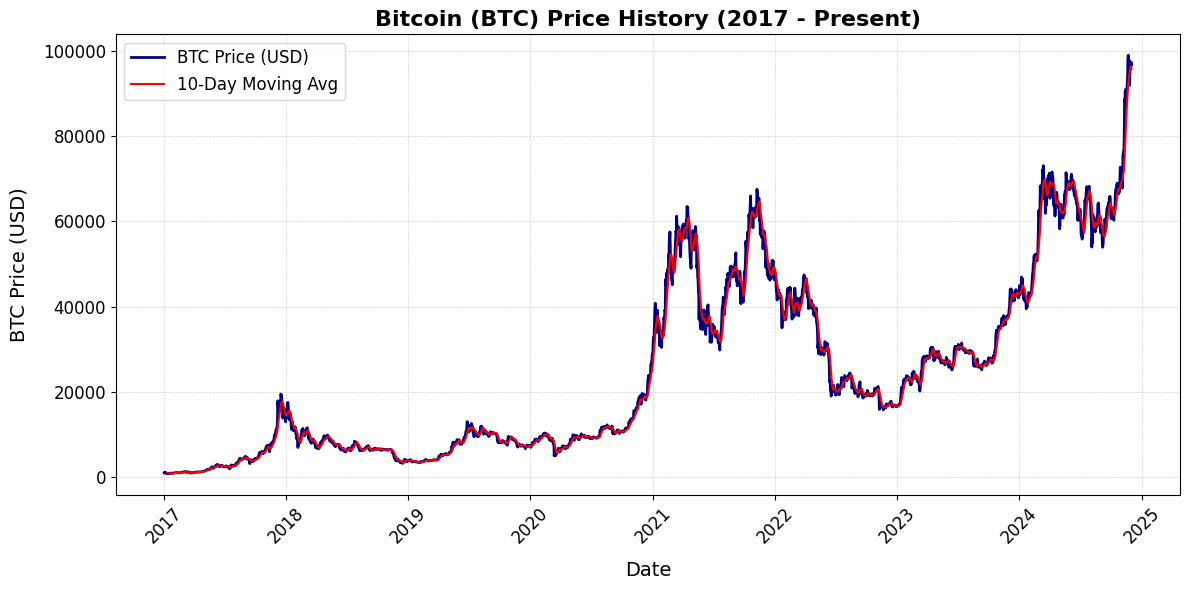

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(12, 6))  # Set figure size

# Plot the data
plt.plot(df['date'], df['close'], color='navy', linewidth=2, label='BTC Price (USD)')
df_avg['Moving_Avg'] = df['close'].rolling(window=10).mean()  # 10-day moving average
plt.plot(df['date'], df_avg['Moving_Avg'], label='10-Day Moving Avg', color='red')
plt.legend()

# Title and labels
plt.title('Bitcoin (BTC) Price History (2017 - Present)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('BTC Price (USD)', fontsize=14, labelpad=10)

# Customize ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Grid and legend
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='upper left')

# Add a tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

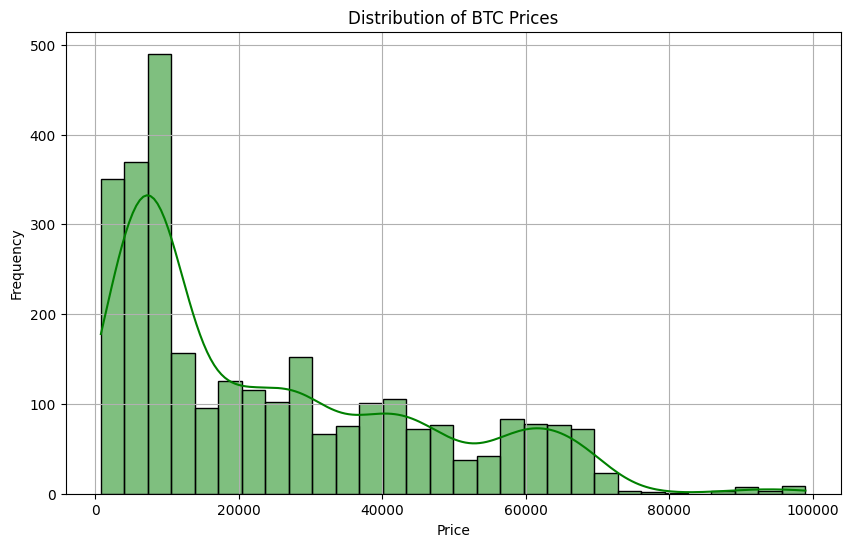

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['close'], kde=True, bins=30, color='green')
plt.title('Distribution of BTC Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

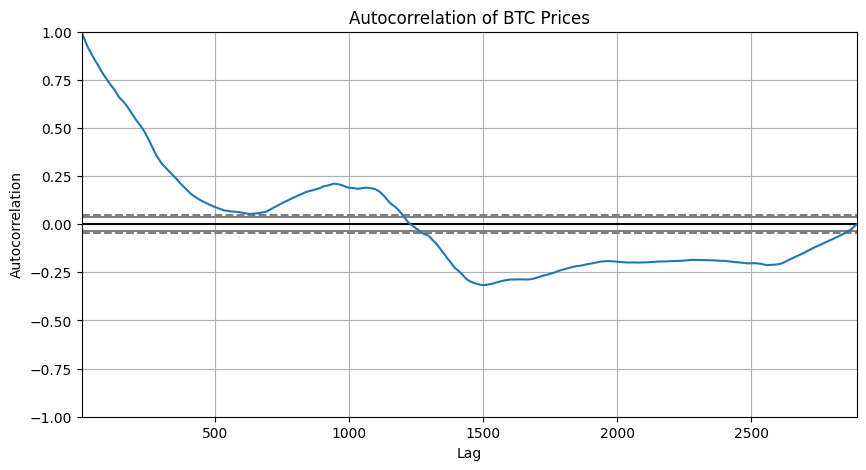

In [ ]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 5))
autocorrelation_plot(df['close'])
plt.title('Autocorrelation of BTC Prices')
plt.show()

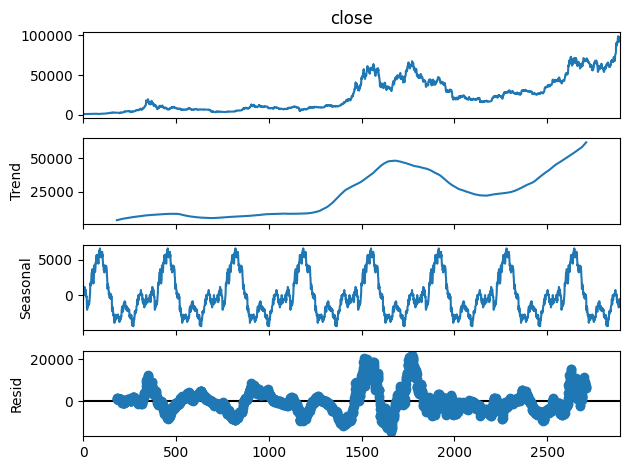

In [ ]:


from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['close'], model='additive', period=365)
decomposition.plot()
plt.show()



In [ ]:
df_timeless=df.drop(columns=['date','RSI'],axis=1)
df_timeless

,open,high,low,volume,close
0,963.66,1003.08,958.70,147775008,998.33
1,998.62,1031.39,996.70,222184992,1021.75
2,1021.60,1044.08,1021.60,185168000,1043.84
3,1044.40,1159.42,1044.40,344945984,1154.73
4,1156.73,1191.10,910.42,510199008,1013.38
...,...,...,...,...,...
2888,95954.95,96650.20,94677.35,52260008261,95652.47
2889,95653.95,98693.17,95407.88,54968682476,97461.52
2890,97468.81,97499.34,96144.22,31634227866,96449.05
2891,96461.34,97888.13,95770.19,36590695296,97279.79


##Preprocessing

In [ ]:
df_test=df_timeless.iloc[2770:].astype(np.float32)  # last 4 month(test)
df_val=df_timeless.iloc[2650:2770].astype(np.float32)  # 4 month before test (val)
df_train=df_timeless.iloc[:2650].astype(np.float32)  # from 2017 till last 8 month(train)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2650 non-null   float32
 1   high    2650 non-null   float32
 2   low     2650 non-null   float32
 3   volume  2650 non-null   float32
 4   close   2650 non-null   float32
dtypes: float32(5)
memory usage: 51.9 KB


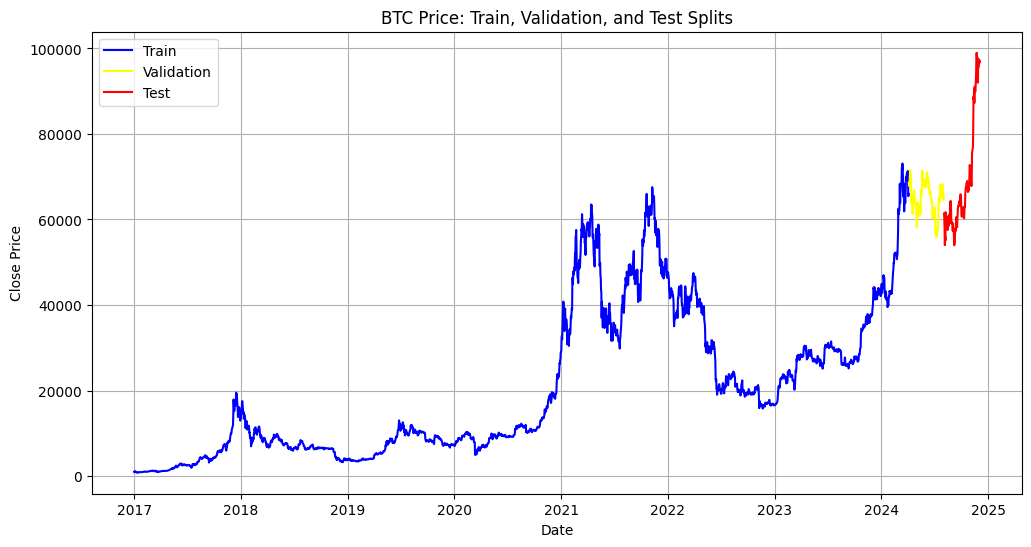

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your original DataFrame with the 'date' column

# Plot the data
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(df['date'][:2650], df_train['close'], label='Train', color='blue')

# Plot validation data
plt.plot(df['date'][2650:2770], df_val['close'], label='Validation', color='yellow')

# Plot test data
plt.plot(df['date'][2770:], df_test['close'], label='Test', color='red')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTC Price: Train, Validation, and Test Splits')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# List of features to scale (excluding 'close' as it's the target)
features_to_scale = ['open', 'high', 'low', 'volume']

# Initialize scalers
scaler = MinMaxScaler(feature_range=(0, 1))  # For features
scaler_y = MinMaxScaler(feature_range=(0, 1))  # For the target 'close'

# Fit the scalers
scaler.fit(df_train[features_to_scale])  # Fit on input features
scaler_y.fit(df_train[['close']].values.reshape(-1, 1))  # Fit only on the target 'close'

# Transform the features
df_train[features_to_scale] = scaler.transform(df_train[features_to_scale])
df_val[features_to_scale] = scaler.transform(df_val[features_to_scale])
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])

# Transform and update the 'close' column in the DataFrame
df_train['close'] = scaler_y.transform(df_train[['close']].values.reshape(-1, 1))
df_val['close'] = scaler_y.transform(df_val[['close']].values.reshape(-1, 1))
df_test['close'] = scaler_y.transform(df_test[['close']].values.reshape(-1, 1))

# Prepare target variables for training, validation, and testing
y_train = df_train[['close']].values
y_val = df_val[['close']].values
y_test = df_test[['close']].values

In [ ]:
def create_sequences(df_timeless, target_col, look_back=30, feature_cols=None):
    X, y = [], []
    for i in range(len(df_timeless) - look_back):
        X.append(df_timeless[feature_cols].iloc[i:i+look_back].values)  # Only use selected features for X
        y.append(df_timeless.iloc[i + look_back][target_col])  # Use 'close' for y
    return np.array(X), np.array(y)

# List of features to use for X (exclude 'close')
features = ['open', 'high', 'low', 'volume']

# Prepare sequences for train, validation, and test sets
X_train, y_train = create_sequences(df_train, target_col='close', look_back=30, feature_cols=features)
X_val, y_val = create_sequences(df_val, target_col='close', look_back=30, feature_cols=features)
X_test, y_test = create_sequences(df_test, target_col='close', look_back=30, feature_cols=features)

y_train = np.reshape(y_train, (-1, 1))
y_val = np.reshape(y_val, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

# Check the shapes of the resulting arrays
print(f"Train X shape: {X_train.shape}, y shape: {y_train.shape}")
print(f"Validation X shape: {X_val.shape}, y shape: {y_val.shape}")
print(f"Test X shape: {X_test.shape}, y shape: {y_test.shape}")

Train X shape: (2620, 30, 4), y shape: (2620, 1)
Validation X shape: (90, 30, 4), y shape: (90, 1)
Test X shape: (93, 30, 4), y shape: (93, 1)


##LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.optimizers import Nadam


# Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),  # Dense layer for intermediate learning
    Dense(1)  # Output layer (predicting the 'Close' price)
])

# Compile the model
learning_rate = 0.001  # Adjust this value as needed

custom_optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1000, restore_best_weights=True,verbose=1)

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,801 (206.25 KB)

 Trainable params: 52,801 (206.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',   # Metric to be monitored
    patience=10,          # Number of epochs with no improvement after which training stops
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
    verbose=1
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 0.0406 - val_loss: 0.0023
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0011 - val_loss: 0.0066
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0010 - val_loss: 0.0035
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 9.0273e-04 - val_loss: 0.0019
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 7.4917e-04 - val_loss: 0.0014
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 7.2504e-04 - val_loss: 0.0013
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 6.5232e-04 - val_loss: 0.0016
Restoring model weights from the end of the best epoch: 9.


In [ ]:
from sklearn.metrics import r2_score
test_loss = model.evaluate(X_test, y_test, verbose=0)
r2 = r2_score(y_test, model.predict(X_test))
print(f"R² Score on Test Data: {r2:.4f}")
print(f"Test Loss (MSE): {test_loss:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step
R² Score on Test Data: 0.8785
Test Loss (MSE): 0.0042


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
print(data.columns)


Index(['date', 'open', 'high', 'low', 'volume', 'close', 'RSI'], dtype='object')


In [ ]:
import optuna
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input, LeakyReLU, ELU, ReLU
from keras.optimizers import Adam, AdamW, RMSprop, Nadam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import r2_score

# Use MirroredStrategy for multi-GPU setup
strategy = tf.distribute.MirroredStrategy()  # Automatically detects and uses available GPUs
print("Number of devices:", strategy.num_replicas_in_sync)

with strategy.scope():  # Everything inside the MirroredStrategy scope
    # Define the objective function for Optuna
    def objective(trial):
        # Hyperparameters to tune
        lstm_units = trial.suggest_int("lstm_units", 128, 256, step=128)
        dense_units = trial.suggest_int("dense_units", 16, 128, step=16)
        dropout_rate = trial.suggest_float("dropout_rate", 0.2, 0.5)
        optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "AdamW","Nadam"])
        activation_function = trial.suggest_categorical("activation_function", ["relu", "leaky_relu", "elu"])

        # Select optimizer based on trial
        if optimizer_name == "Adam":
            optimizer = Adam(learning_rate=0.00025)
        elif optimizer_name == "AdamW":
            optimizer = AdamW(learning_rate=0.00025)
        elif optimizer_name == "Nadam":
            optimizer = Nadam(learning_rate=0.00025)

        # Create the model
        model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(lstm_units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(dropout_rate),
    LSTM(lstm_units, return_sequences=True),
    Dropout(dropout_rate),
    LSTM(lstm_units, return_sequences=False),
    Dropout(dropout_rate),
    Dense(dense_units, activation=None),  # No activation function here
    # Dynamically apply the activation function
    LeakyReLU(alpha=0.1) if activation_function == "leaky_relu" else
    ELU(alpha=1.0) if activation_function == "elu" else
    ReLU(),
    Dense(1)  # Final output for regression
])

        model.compile(optimizer=optimizer, loss='mean_squared_error')

        # Add EarlyStopping and ModelCheckpoint
        early_stop = EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True,
            verbose=1
        )

        # Train the model
        model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=100,
            batch_size=128,  # Adjusted for GPU performance
            verbose=0,
            callbacks=[early_stop]
        )

        # Predict on test data
        y_test_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_test_pred)

        return 1 - r2  # Optuna minimizes, so we invert R²

    # Setting up SQLite ,that if your net or pc getting shut down,it wont start from zero.
    study_name = "time_series_optimization_gpu"  # Name your study
    storage_name = "sqlite:///optuna_study_gpu.db"  # SQLite file for persistent storage

    # Create or load existing study
    study = optuna.create_study(
        study_name=study_name,
        storage=storage_name,
        direction="minimize",
        load_if_exists=True
    )

    # Run Optuna optimization
    study.optimize(objective, n_trials=50)

    # Best hyperparameters based on test R² score
    print("Best trial:")
    trial = study.best_trial
    print(f"R² on test set: {1 - trial.value:.4f}")
    print(f"Best Hyperparameters: {trial.params}")

[I 2025-02-14 07:42:32,257] Using an existing study with name 'time_series_optimization_gpu' instead of creating a new one.


Number of devices: 1


[W 2025-02-14 07:42:58,665] Trial 1 failed with parameters: {'lstm_units': 256, 'dense_units': 112, 'dropout_rate': 0.38061169231273545, 'optimizer': 'Adam', 'activation_function': 'relu'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "<ipython-input-33-4031946f2314>", line 59, in objective
    model.fit(
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 395, in fit
    val_logs = self.evaluate(
               ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **

KeyboardInterrupt: 

##EVALUATION

In [ ]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
y_test_true = scaler_y.inverse_transform(y_test)
y_test_pred = scaler_y.inverse_transform(y_pred)

In [ ]:
#Combine df_train and df_val
df_final = pd.DataFrame(df[:2770])
df_final_test=pd.DataFrame(df[2770:])

In [ ]:
# Align dates for the test set based on look_back
aligned_dates = df_final_test['date'][30:].reset_index(drop=True)

# Ensure alignment of predicted values
y_test_pred_DF = pd.DataFrame({
    'date': aligned_dates[:len(y_test_pred)],  # Slice dates to match predictions
    'predicted_close': y_test_pred.flatten()  # Flatten predictions
})

# Display the result

In [ ]:
df_test2=pd.DataFrame(df[2800:]).reset_index(drop=True)

In [ ]:
y_test_pred_df=pd.DataFrame(y_test_pred_DF,columns=['predicted_close']).reset_index(drop=True)
y_test_pred_df = pd.concat([df_test2, y_test_pred_df], axis=1)

# Display the resulting DataFrame
y_test_pred_df

,date,open,high,low,volume,close,RSI,predicted_close
0,2024-09-01,58969.80,59062.07,57217.82,24592449997,57325.49,40.32,61919.390625
1,2024-09-02,57326.97,59403.07,57136.03,27036454524,59112.48,46.32,61384.753906
2,2024-09-03,59106.19,59815.06,57425.17,26666961053,57431.02,42.04,60803.808594
3,2024-09-04,57430.35,58511.57,55673.16,35627680312,57971.54,43.84,60329.914062
4,2024-09-05,57971.70,58300.58,55712.45,31030280656,56160.49,39.42,59750.523438
...,...,...,...,...,...,...,...,...
88,2024-11-28,95954.95,96650.20,94677.35,52260008261,95652.47,65.86,92482.406250
89,2024-11-29,95653.95,98693.17,95407.88,54968682476,97461.52,68.18,92405.023438
90,2024-11-30,97468.81,97499.34,96144.22,31634227866,96449.05,65.50,92412.648438
91,2024-12-01,96461.34,97888.13,95770.19,36590695296,97279.79,66.66,92553.828125


<ipython-input-40-45b77cc72230>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


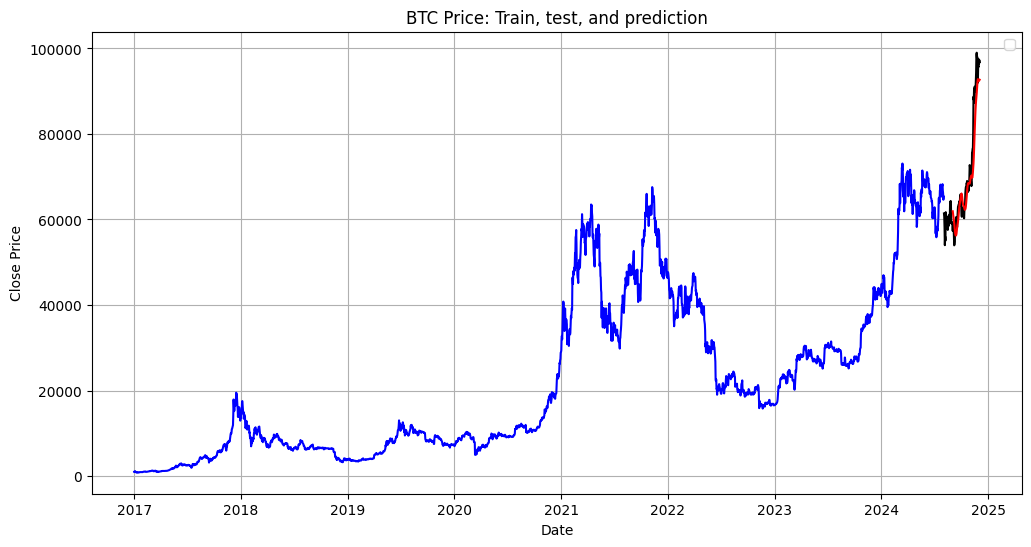

In [ ]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 6), facecolor='white')

# Plot training data
plt.plot(df_final['date'], df_final['close'], color='blue')
plt.plot(df_final_test['date'], df_final_test['close'], color='black')
plt.plot(y_test_pred_df['date'], y_test_pred_df['predicted_close'], color='red')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTC Price: Train, test, and prediction')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


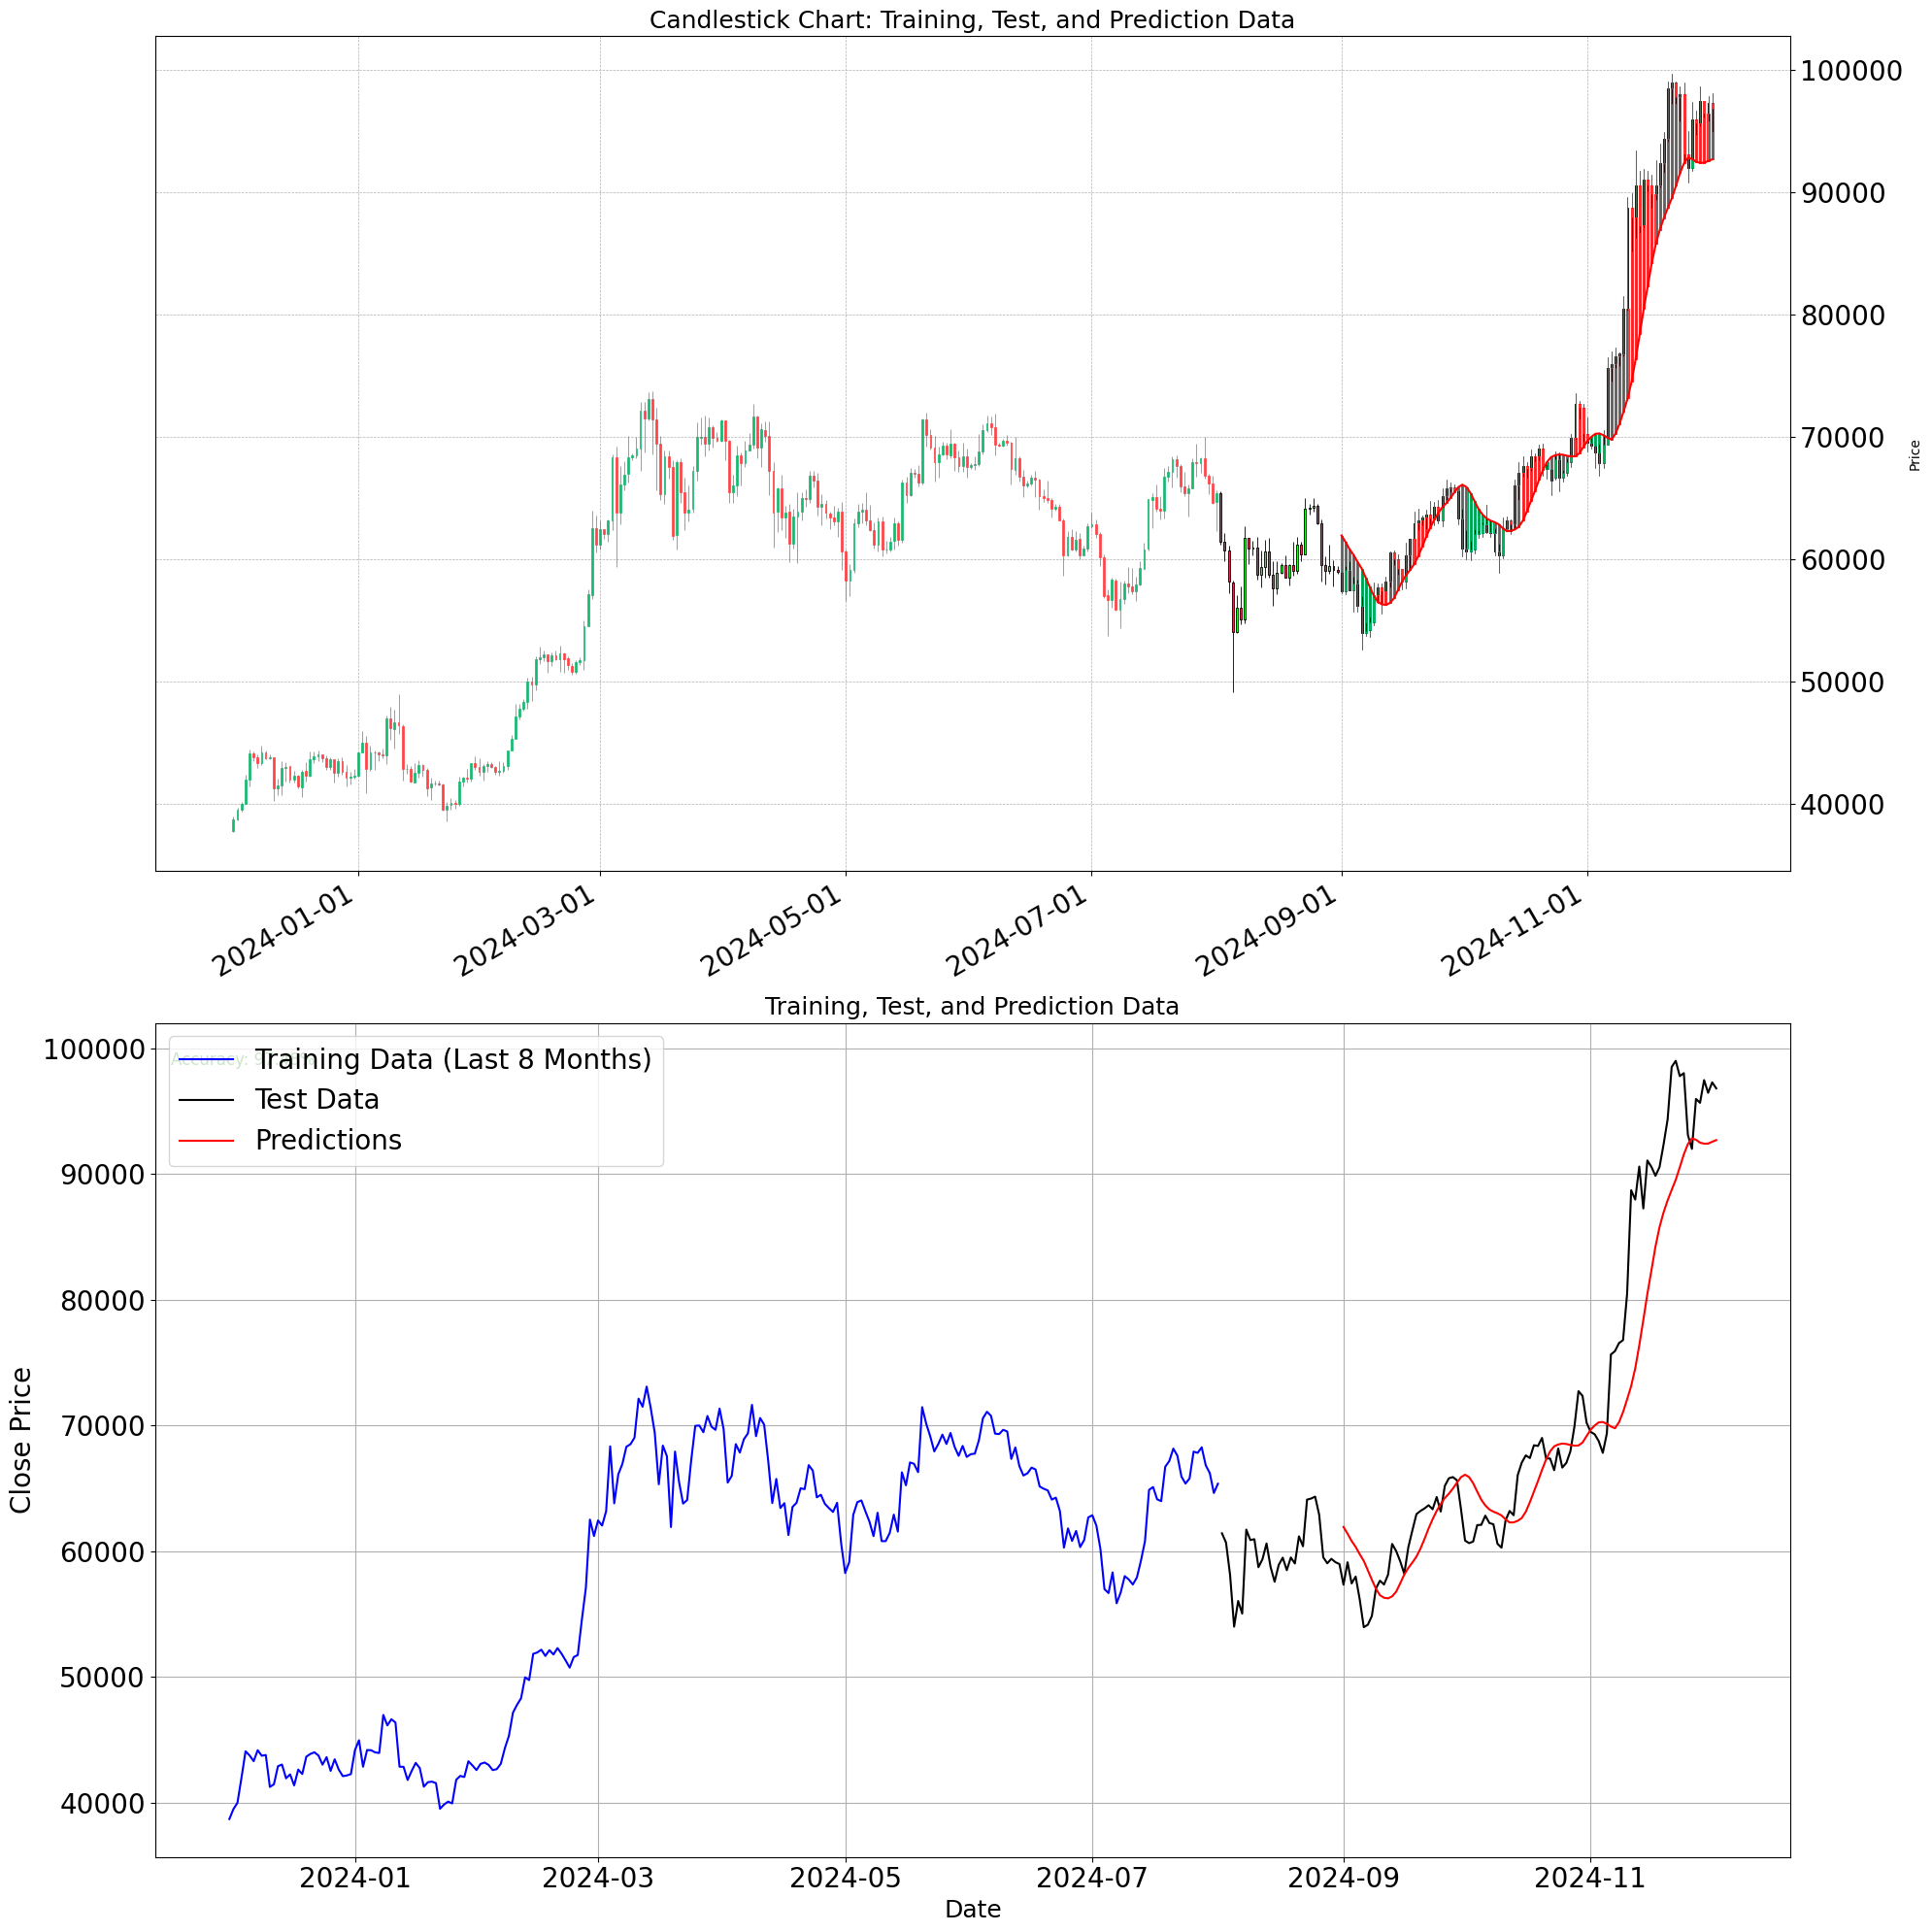

In [ ]:
import matplotlib.pyplot as plt
import mplfinance as mpf  # For candlestick plotting
import pandas as pd  # Ensure pandas is imported for data handling
from matplotlib.dates import DateFormatter

# Ensure date columns are in datetime format
df_final['date'] = pd.to_datetime(df_final['date'])
df_final_test['date'] = pd.to_datetime(df_final_test['date'])
y_test_pred_df['date'] = pd.to_datetime(y_test_pred_df['date'])

# Define accuracy value
accuracy = 97.48

# --- Data Preparation ---
# Filter last 8 months of training data
train_last_8_months = df_final[df_final['date'] >= (df_final['date'].max() - pd.DateOffset(months=8))]

# Prepare candlestick data for training
train_candle_data = train_last_8_months[['date', 'open', 'high', 'low', 'close']].copy()
train_candle_data.set_index('date', inplace=True)

# Prepare candlestick data for test
test_candle_data = df_final_test[['date', 'open', 'high', 'low', 'close']].copy()
test_candle_data.set_index('date', inplace=True)

# Prepare candlestick data for predictions
prediction_candle_data = y_test_pred_df[['date', 'open', 'high', 'low', 'predicted_close']].copy()
prediction_candle_data.rename(
    columns={
        'Open': 'open',
        'High': 'high',
        'Low': 'low',
        'predicted_close': 'close'
    },
    inplace=True
)
prediction_candle_data.set_index('date', inplace=True)

# --- Plotting ---
# Create a figure with adjusted layout
fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(2, 1)  # Two rows: one for candlestick, one for line chart

# --- Candlestick Chart (Training, Test, and Predictions) ---
# Subplot for candlestick chart
ax1 = fig.add_subplot(gs[0, 0])

# Plot Training Data as Candlestick Chart
mpf.plot(
    train_candle_data,
    type='candle',
    style='yahoo',  # Optional: Use a pre-defined style
    show_nontrading=True,
    ax=ax1,
    ylabel='Price',
    volume=False  # Exclude volume bar if unnecessary
)

# Define a custom style for Test Data
custom_marketcolors_test = mpf.make_marketcolors(
    up='lime',         # Color for upward candles
    down='crimson',    # Color for downward candles
    edge='black',      # Edge color for candles
    wick='black',      # Wick color
)

custom_style_test = mpf.make_mpf_style(
    base_mpf_style='yahoo',
    marketcolors=custom_marketcolors_test
)

# Plot Test Data as Candlestick Chart
mpf.plot(
    test_candle_data,
    type='candle',
    style=custom_style_test,
    show_nontrading=True,
    ax=ax1
)

# Define a custom style for Predictions
custom_marketcolors_pred = mpf.make_marketcolors(
    up='green',         # Color for upward candles
    down='red',     # Color for downward candles
    edge='black',      # Edge color for candles
    wick='black',      # Wick color
)

custom_style_pred = mpf.make_mpf_style(
    base_mpf_style='yahoo',
    marketcolors=custom_marketcolors_pred
)

# Overlay Predictions as Candlestick Chart
mpf.plot(
    prediction_candle_data,
    type='candle',
    style='yahoo',
    show_nontrading=True,
    ax=ax1
)

ax1.plot(
    prediction_candle_data.index,
    prediction_candle_data['close'],
    color='red',
    alpha=1,
    linestyle='-',
    label='Prediction Line'
)

# Add grid to the candlestick chart
ax1.grid(True, linestyle='--', linewidth=0.5)


# Format x-axis labels to display dates in Year-Month-Day format
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()  # Rotate x-axis labels for better visibility

# Add title to the candlestick chart
ax1.set_title('Candlestick Chart: Training, Test, and Prediction Data', fontsize=18)

# --- Line Chart (Training, Test, and Predictions) ---
# Subplot for line chart
ax2 = fig.add_subplot(gs[1, 0])

# Plot Training Data (Last 8 Months), Test Data, and Predictions
ax2.plot(train_last_8_months['date'], train_last_8_months['close'], color='blue', label='Training Data (Last 8 Months)')
ax2.plot(df_final_test['date'], df_final_test['close'], color='black', label='Test Data')
ax2.plot(y_test_pred_df['date'], y_test_pred_df['predicted_close'], color='red', label='Predictions')

# Add labels, legend, and grid
ax2.set_xlabel('Date', fontsize=18)
ax2.set_ylabel('Close Price', fontsize=20)
ax2.legend(loc='upper left', fontsize=20)
ax2.grid(True)

# Add accuracy as text
ax2.text(0.01, 0.95, f'Accuracy: {accuracy:.2f}%', transform=ax2.transAxes, fontsize=12, color='green', ha='left')

# Add title to the line chart
ax2.set_title('Training, Test, and Prediction Data', fontsize=18)

# Resize ticks
ax1.tick_params(axis='x', labelsize=20)  # Resize x-ticks
ax1.tick_params(axis='y', labelsize=20)  # Resize y-ticks
ax2.tick_params(axis='x', labelsize=20)  # Resize x-ticks
ax2.tick_params(axis='y', labelsize=20)  # Resize y-ticks

# Adjust layout and save
plt.tight_layout()
plt.savefig('btc_price_candlestick_and_line_chart_with_predictions.png', dpi=300)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# List of features to scale (excluding 'close' as it's the target)
features_to_scale = ['open', 'high', 'low', 'volume']

# Initialize scalers
scaler = MinMaxScaler(feature_range=(0, 1))  # For features
scaler_y = MinMaxScaler(feature_range=(0, 1))  # For the target 'close'

# Fit the scalers
scaler.fit(df_timeless[features_to_scale])  # Fit on input features
scaler_y.fit(df_timeless[['close']].values.reshape(-1, 1))  # Fit only on the target 'close'

# Transform the features
df_timeless[features_to_scale] = scaler.transform(df_timeless[features_to_scale])

# Transform and update the 'close' column in the DataFrame
df_timeless['close'] = scaler_y.transform(df_timeless[['close']].values.reshape(-1, 1))

# Prepare target variables for training, validation, and testing
y_train_future = df_timeless[['close']].values

In [ ]:
# Function to create sequences (ensuring only features are included in X)
def create_sequences(df_timeless, target_col, look_back=30, feature_cols=None):
    X, y = [], []
    for i in range(len(df_timeless) - look_back):
        X.append(df_timeless[feature_cols].iloc[i:i+look_back].values)  # Only use selected features for X
        y.append(df_timeless.iloc[i + look_back][target_col])  # Use 'close' for y
    return np.array(X), np.array(y)

# List of features to use for X (exclude 'close')
features = ['open', 'high', 'low', 'volume']

# Prepare sequences for train, validation, and test sets
X_train_future, y_train_future = create_sequences(df_timeless, target_col='close', look_back=30, feature_cols=features)
y_train_future = np.reshape(y_train_future, (-1, 1))

# Check the shapes of the resulting arrays
print(f"Train X_future shape: {X_train_future.shape}, y_future shape: {y_train_future.shape}")

Train X_future shape: (2863, 30, 4), y_future shape: (2863, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.optimizers import Nadam


# Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_future.shape[1], X_train_future.shape[2])),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),  # Dense layer for intermediate learning
    Dense(1)  # Output layer (predicting the 'Close' price)
])

# Compile the model
learning_rate = 0.001  # Adjust this value as needed

custom_optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True,verbose=1)

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 30, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,801 (206.25 KB)

 Trainable params: 52,801 (206.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train_future, y_train_future,
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0290
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 9.3142e-04
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 7.8068e-04
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 6.6068e-04
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 8.4653e-04
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 6.4989e-04
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.5573e-04
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 5.2854e-04
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 8.3156e-04
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 5.1431e-04
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 4.7981e-04
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 4.4651e-04
Epoch 13/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 4.3668e-04
Epoch 14/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 3.9043e-04
Epoch 15/20
45/45 ━

In [ ]:
# Drop the target column from df_timeless
df_timeless_features = df_timeless.drop(columns=['close'])
look_back=30
last_sequence = df_timeless_features.iloc[-look_back:].values.reshape(1, look_back, X_train_future.shape[2])

In [ ]:
future_prediction_x = model.predict(last_sequence)
future_prediction = scaler_y.inverse_transform(future_prediction_x)
print(f"Future Prediction: {future_prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Future Prediction: 95625.4921875


In [ ]:
look_back = 30  # Number of timesteps
current_sequence = X_train_future[-1:].copy()  # Start with the last sequence
future_predictions = []

for _ in range(10):  # Predict for 10 future days
    # Make the prediction
    next_pred = model.predict(current_sequence)
    #next_pred = scaler_y.inverse_transform(next_pred_X)
    future_predictions.append(next_pred[0][0])  # Save the scalar prediction

    # Update the sequence: Keep other feature values, update the predicted one
    new_feature_vector = current_sequence[:, -1:, :].copy()  # Copy the last timestep
    new_feature_vector[0, 0, -1] = next_pred[0][0]  # Update the prediction for the target feature

    # Append the new feature vector to the sequence, dropping the oldest timestep
    current_sequence = np.append(current_sequence[:, 1:, :], new_feature_vector, axis=1)

print(f"10-Day Predictions: {future_predictions}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
10-Day Predictions: [0.9618482, 0.97283506, 0.9850111, 0.9954435, 1.003273, 1.0087309, 1.0123634, 1.01479, 1.0164801, 1.0177782]


In [ ]:
# Ensure future_predictions is a 2D array before applying inverse_transform
next_pred_y = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1))
print(next_pred_y)

[[ 95250.39 ]
 [ 96329.52 ]
 [ 97525.45 ]
 [ 98550.125]
 [ 99319.14 ]
 [ 99855.21 ]
 [100212.   ]
 [100450.34 ]
 [100616.336]
 [100743.836]]


In [ ]:
import pandas as pd

# Generate dates for the predictions
prediction_dates = pd.date_range(start="2024-12-03", periods=10)

# Create a DataFrame with the dates and predicted values
predicted_df = pd.DataFrame({
    "Date": prediction_dates,
    "Predicted_Y": next_pred_y.flatten()  # Flatten to convert to a 1D array
})
predicted_df

,Date,Predicted_Y
0,2024-12-03,95250.390625
1,2024-12-04,96329.523438
2,2024-12-05,97525.453125
3,2024-12-06,98550.125000
4,2024-12-07,99319.140625
5,2024-12-08,99855.210938
6,2024-12-09,100212.000000
7,2024-12-10,100450.343750
8,2024-12-11,100616.335938
9,2024-12-12,100743.835938
